# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No

## Group Member Names:
1. ASHIQUE ZZAMAN (2021SC04612)


# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

#### 1. Business Problem
Since fetal risk and mortality is such a devastating problem, what can be done to decrease these numbers and preserve maternal and fetal health? we will be getting answers to the question of how to predict fetal health outcomes based on Cardiotocograms (CTG) data. This information can be used by medical professionals, specifically in the field of obstetrics, to minimize the occurrence of fetal mortality. While this is arguably more of a health problem than a business problem, medical practices can benefit greatly from these findings by ensuring the best possible patient health.
We will be working towards answering the following questions:
Below are few questions for for which we will be working to get answers -
1. Can performing CTGs as preventative care help predict fetal health outcomes.
2. If so, which measures on a CTG exam are most significant when predicting fetal health outcomes.
3. What can an individual healthcare provider do to help the global cause of decreasing fetal mortality? What exactly should be prioritized.

#### 2. Data
For the above problem, we need data extracted from Cardiotocogram (CTG) exams. The dataset used for this project can be found at https://www.ai-tech.systems/fetal-health-classification-on-cainvas/. 
Citation: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318. The original study can be found at https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9.

#### 3. Source of Data
Data contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetritians into 3 classes:
1. Normal
2. Suspect
3. Pathological

#### 4. Analytics Tasks
Below are the Analytics tasks performed - 
1. Data Requirement Gathering: Analysed the type of data we wanted to use, and what data we plan to analyze.
2. Data Collection: Guided by the identified requirements, we collected the data from the sources. Sources include case studies, surveys, experiments, questionnaires, direct observation, and focus groups. Made sure to organize the collected data for analysis.Then stored the data into Dataframe for analysis.
3. Data Cleaning: Not all of the data we collect will be useful, so we needed to clean it up. This process is where we remove duplicate records, and basic errors. Data cleaning is mandatory before sending the information on for analysis.
4. Data Analysis: Here is where we used data analysis technolgies, tools and modules to interpret and understand the data and arrive at conclusions. We used Plottings, EDA, Feature selection, etc.
5. Data Interpretation: Now that we have our results, you need to interpret them and come up with the best ML model.
6. Data Visualization: Data visualization is a fancy way of saying, “graphically show the information in a way that people can read and understand it.” You can used Histograms, Distributions, Box Plottings, Correlation Heatmaps, etc. Also used ELI5 for Model Explainablity. Visualization helps us derive valuable insights by helping compare datasets and observe relationships.


## Installing Packages

In [ ]:
!pip install skfeature-chappers --user

In [ ]:
!pip install xgboost --user

In [ ]:
!pip install ruamel_yaml --user

In [ ]:
!pip install eli5 --user

In [ ]:
!pip install tpot --user 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile

from tpot import TPOTClassifier
from tpot.export_utils import set_param_recursive

import xgboost
import eli5


%matplotlib inline

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [2]:
df_fetal = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/fetal_health.csv')

## 2.2 Code for converting the above downloaded data into a dataframe

In [3]:
df_fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [4]:
df_fetal.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df_fetal.tail(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [6]:
df_fetal.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
df_fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df_fetal.shape


(2126, 22)

In [9]:
df_fetal.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

In [10]:
# Returns number of rows times number of columns

df_fetal.size

46772

In [11]:
# Size

size_ib = sys.getsizeof(df_fetal)

print(f'Size of the Dataframe (In Bytes) : {size_ib} bytes')

Size of the Dataframe (In Bytes) : 374320 bytes


In [12]:
# Memory Usage

mu_ib = df_fetal.memory_usage(index=True, deep=True).sum()

print(f'Memory Usage of the Dataframe (In Bytes) : {mu_ib} bytes')

Memory Usage of the Dataframe (In Bytes) : 374304 bytes


In [13]:
def data_info():
    temp_ps = pd.DataFrame(index=df_fetal.columns)
    temp_ps['DataType'] = df_fetal.dtypes
    temp_ps["Non-null_Values"] = df_fetal.count()
    temp_ps['Unique_Values'] = df_fetal.nunique()
    temp_ps['NaN_Values'] = df_fetal.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df_fetal))*100 
    return temp_ps

data_info()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
baseline value,float64,2126,48,0,0.0
accelerations,float64,2126,20,0,0.0
fetal_movement,float64,2126,102,0,0.0
uterine_contractions,float64,2126,16,0,0.0
light_decelerations,float64,2126,16,0,0.0
severe_decelerations,float64,2126,2,0,0.0
prolongued_decelerations,float64,2126,6,0,0.0
abnormal_short_term_variability,float64,2126,75,0,0.0
mean_value_of_short_term_variability,float64,2126,57,0,0.0
percentage_of_time_with_abnormal_long_term_variability,float64,2126,87,0,0.0


The columns are described from the data source as follows:

1.  baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)
2.  accelerations - Number of accelerations per second
3.  fetal_movement - Number of fetal movements per second
4.  uterine_contractions - Number of uterine contractions per second
5.  light_decelerations - Number of light decelerations per second
6.  severe_decelerations - Number of severe decelerations per second
7.  prolongued_decelerations - Number of prolonged decelerations per second
8.  abnormal_short_term_variability - Percentage of time with abnormal short-term variability
9.  mean_value_of_short_term_variability - Mean value of short-term variability
10. percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability
11. mean_value_of_long_term_variability - Mean value of long-term variability
12. histogram_width - Width of FHR histogram (generated from exam)
13. histogram_min - Minimum of FHR histogram (generated from exam)
14. histogram_max - Maximum of FHR histogram (generated from exam)
15. histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)
16. histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)
17. histogram_mode - Mode of FHR histogram (generated from exam)
18. histogram_mean - Mean of FHR histogram (generated from exam)
19. histogram_median - Median of FHR histogram (generated from exam)
20. histogram_variance - Variance of FHR histogram (generated from exam)
21. histogram_tendency - Tendency of FHR histogram (generated from exam)
22. fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological

In [14]:
# Null Data

df_fetal.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There is no Null data

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [15]:
# Duplicate Data

df_fetal.duplicated().sum()

13

In [16]:
# Missing Data

missing_total = df_fetal.isnull().sum().sort_values(ascending = False)
missing_pct = (df_fetal.isnull().sum()/df_fetal.isnull().count()*100).sort_values(ascending = False)
missing_value_df = pd.concat([missing_total,missing_pct],axis = 1, keys = ['missing_total','missing_pct'])
missing_value_df

,missing_total,missing_pct
baseline value,0,0.0
accelerations,0,0.0
histogram_tendency,0,0.0
histogram_variance,0,0.0
histogram_median,0,0.0
histogram_mean,0,0.0
histogram_mode,0,0.0
histogram_number_of_zeroes,0,0.0
histogram_number_of_peaks,0,0.0
histogram_max,0,0.0


There is no Null data

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [17]:
# Dropping duplicates

df_fetal.drop_duplicates(inplace=True)

In [18]:
# Converting 'fetal_health' column to int

df_fetal['fetal_health']=df_fetal.fetal_health.astype('int64')

In [19]:
# Renaming baseline value column to make it easier to work with

df_fetal = df_fetal.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations', 'percentage_of_time_with_abnormal_long_term_variability': '%_time_with_abnormal_long_term_var'})


<AxesSubplot:>

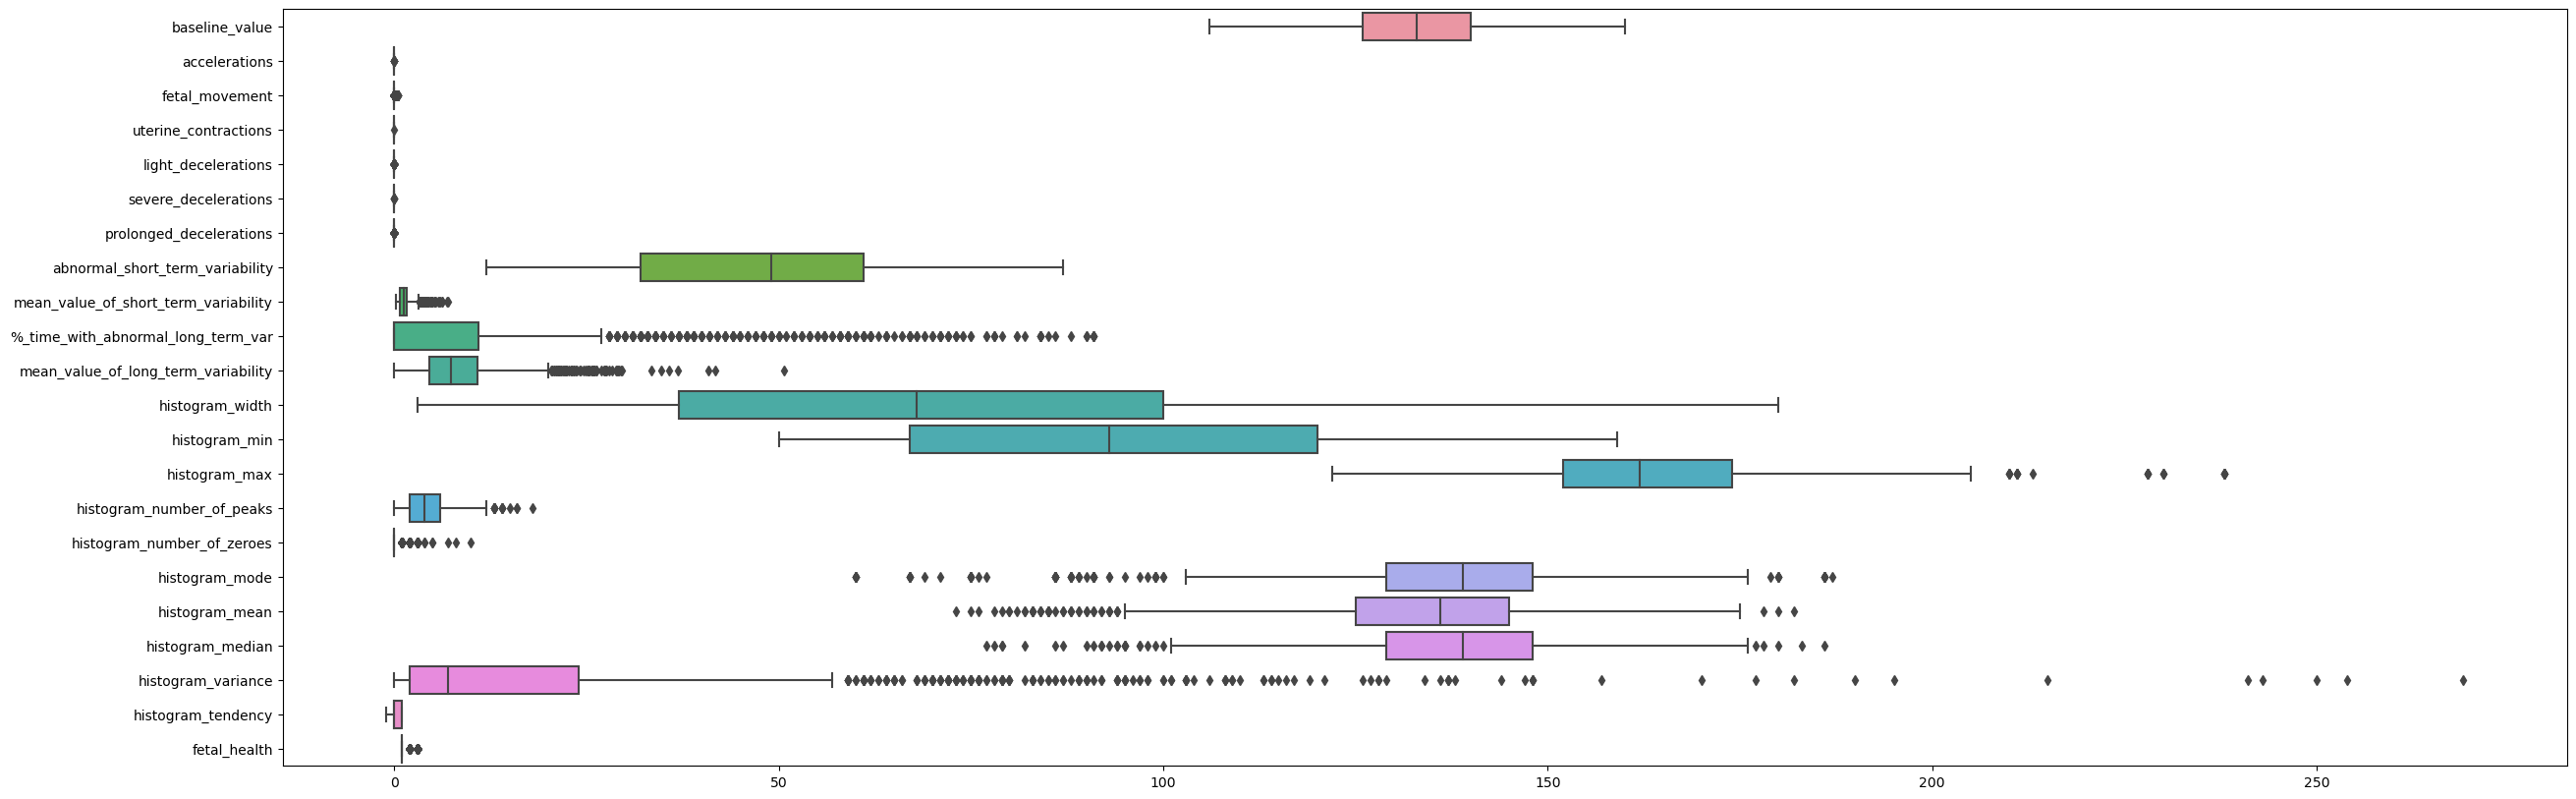

In [20]:
# Outliers

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax=ax, data=df_fetal,orient='h')

Outliers are very numerous and scattered within the dataset. Forcefully eliminating them would mean not only significantly reducing the dataset but almost certainly depriving oneself of the information necessary to identify suspicious or pathological cases.

Given the nature of the problem, it is very probable, in fact, that these points are actually genuine data and for this reason they will be kept in full

In [21]:
# Checking value counts for target variable

df_fetal.fetal_health.value_counts()

1    1646
2     292
3     175
Name: fetal_health, dtype: int64

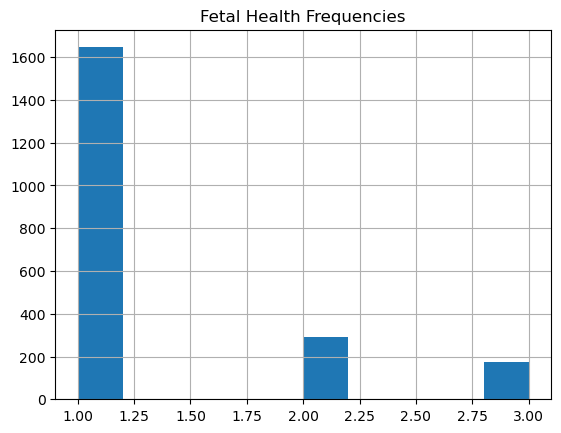

In [22]:
# Plotting target variable frequencies

df_fetal.fetal_health.hist()
plt.title('Fetal Health Frequencies');

It can be seen that, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.
To make the data slightly easier to work with and understand, and turn this into a binary classification problem, let's combine the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. Also, designated all the values of 1.00 as Normal.

In [23]:
# Engineering new categorical target column for Normal and At Risk fetal health

df_fetal.loc[df_fetal['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df_fetal.loc[df_fetal['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df_fetal.loc[df_fetal['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

Removed the original fetal_health column from the dataframe.

In [24]:
# Dropping original fetal_health column from the dataframe

df_fetal = df_fetal.drop(columns='fetal_health', axis=1)

In [25]:
# Value count of Fetal Health

df_fetal.fh_outcome.value_counts()

Normal     1646
At Risk     467
Name: fh_outcome, dtype: int64

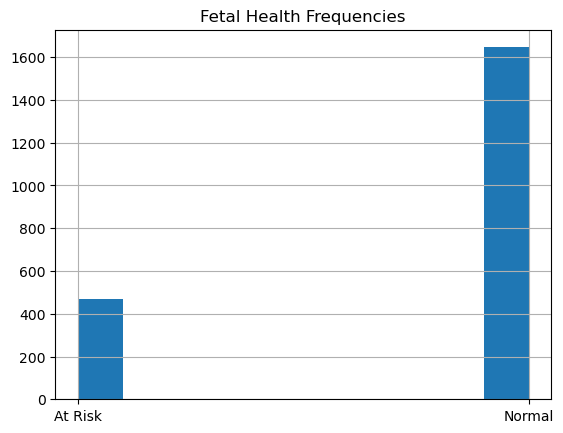

In [26]:
# Plotting Fetal Health frequencies

df_fetal.fh_outcome.hist()
plt.title('Fetal Health Frequencies');

This is still very unbalanced, but is somewhat more straightforward as a binary classification problem. And if we are working to maximize fetal health, then any member of an at-risk category should be treated with seriousness and urgency.

## 3.3 Encode categorical data

Every feature in the data is already numerical (float/int) so there is not much encoding necessary, aside from the target variable. With that being said, opted to tackle the encoding of the target variable using pd.get_dummies.

In [27]:
df_fetal = pd.get_dummies(df_fetal, columns=['fh_outcome'])

In [28]:
df_fetal = df_fetal.drop(columns=['fh_outcome_Normal'], axis=1)

In [29]:
df_fetal = df_fetal.rename(columns={'fh_outcome_At Risk':'target'})

In [30]:
df_fetal['target'] = df_fetal.target.astype('int64')

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [31]:
##---------Type the code below this line------------------##

***There is no Text data in the dataset so skipping this part

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

#### Report:
1. We used Pandas drop_duplicates method to remove duplicate data
2. There was no Null or Missing data, so didn't do Imputing or Removal of data
3. Worked on various technique to ensure data consistencies like casting and renaming of attributes, transforming the target attribute and dummification. 


***There was no Text data in our dataset, so didn't perform any activities related to text data

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [32]:
# Setting target and features

y = df_fetal['target']
X = df_fetal.drop(columns='target')

To make the data slightly easier to work with and understand, and turn this into a binary classification problem, already combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. Also, designated all the values of 1.00 as Normal. So there is no need for One-hot encoding on target.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

### FacetGrid : Variables - Target variable relationship

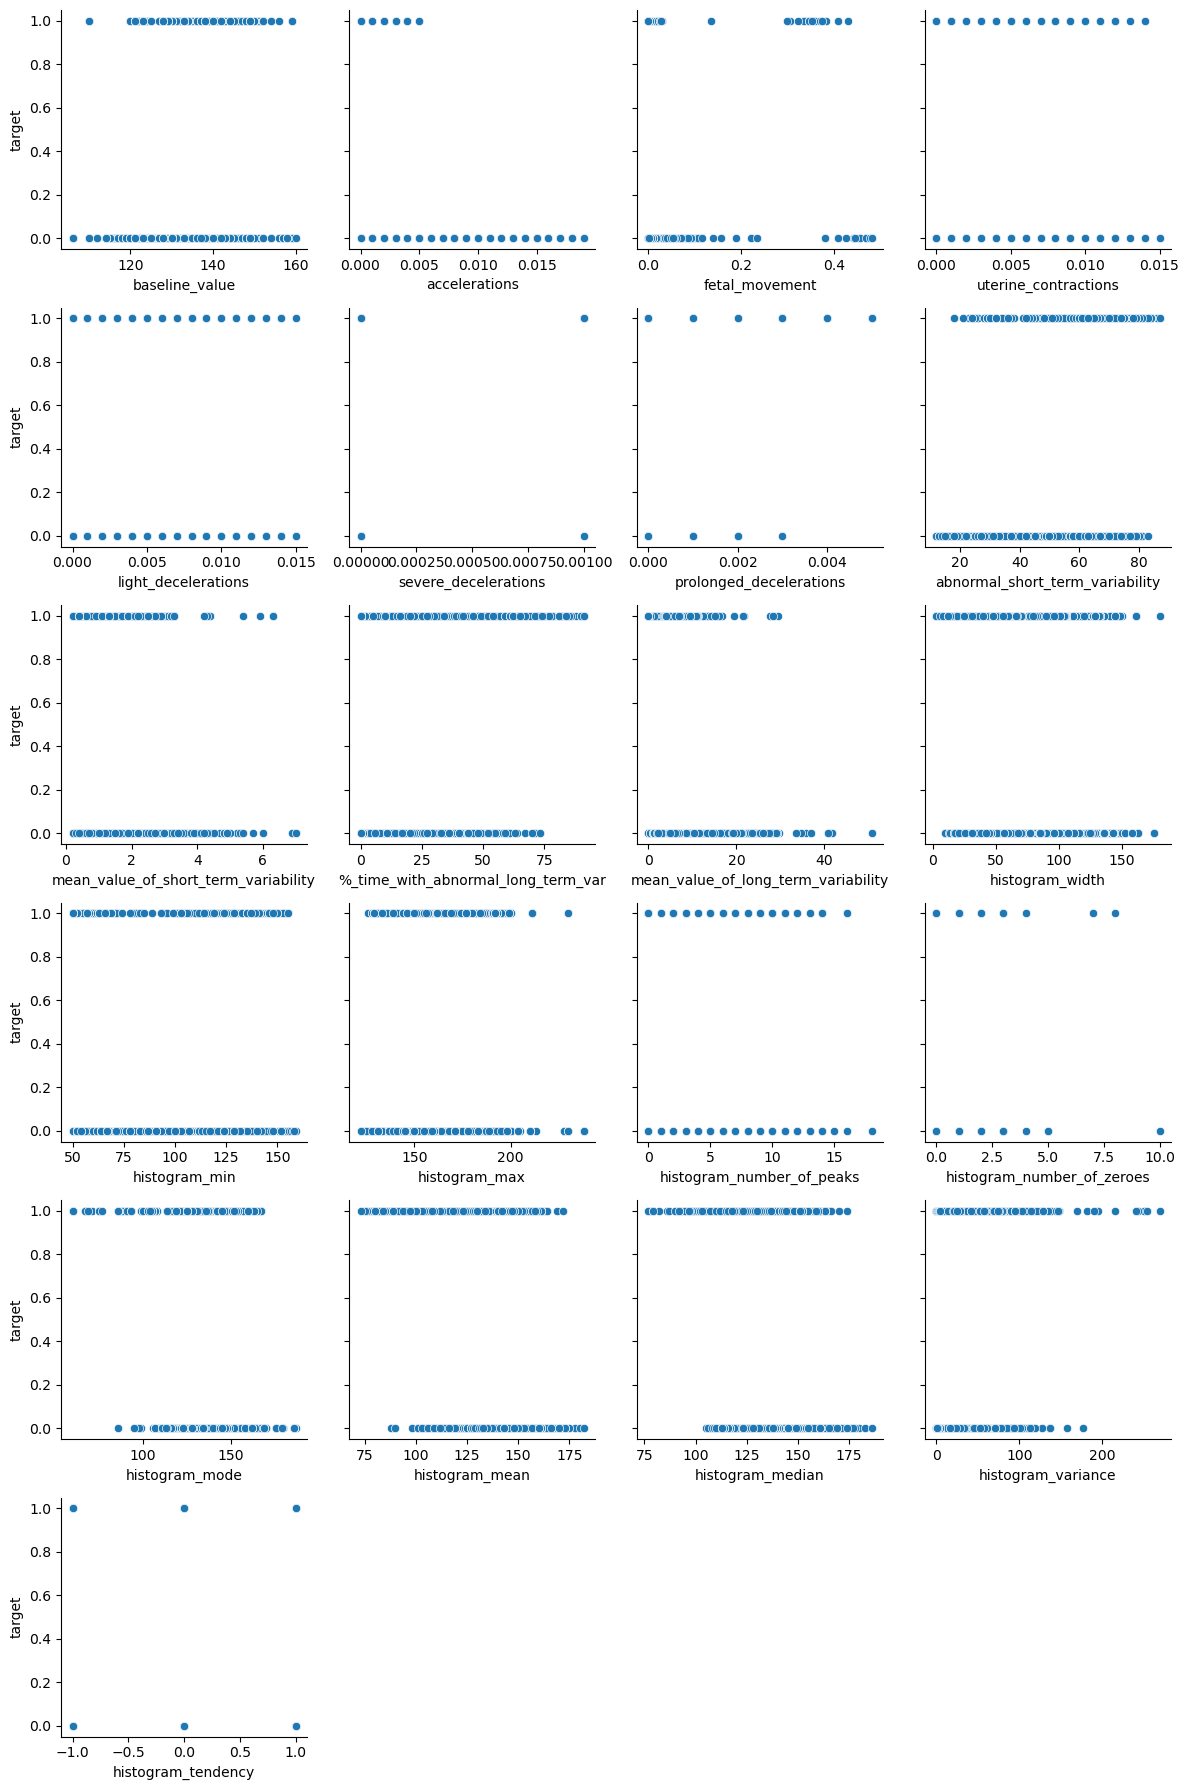

In [33]:
# Variables - Target variable relationship

data = df_fetal

y_name = 'target'
features_names = ['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       '%_time_with_abnormal_long_term_var',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'] 
column_names = features_names + [y_name]
df_fetal.columns = column_names

plot_size=7
num_plots_x=5                                              # No. of plots in every row
num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

'''
for i in range(num_plots_y):
    start = i * num_plots_x
    end = start + num_plots_x
    sns.pairplot(x_vars=features_names[start:end], y_vars=y_name, data=data)
'''

g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=4, sharex=False)
for ax, x_var in zip(g.axes, features_names):
    sns.scatterplot(data=data, x=x_var, y=y_name, ax=ax)
g.tight_layout()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [34]:
df_fetal.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       '%_time_with_abnormal_long_term_var',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'target'],
      dtype='object')

### Histogram Plot

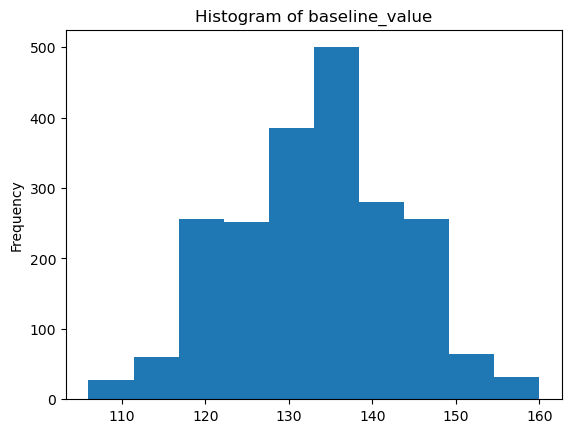

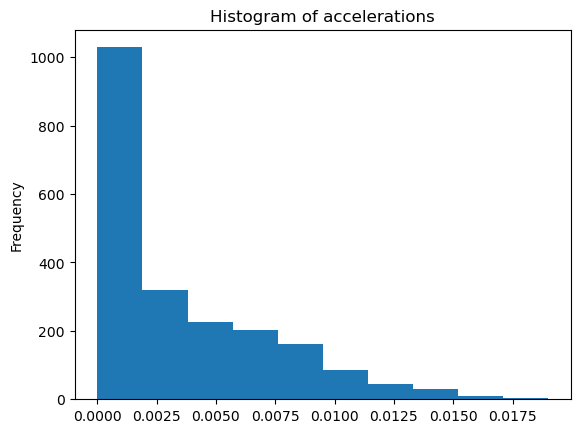

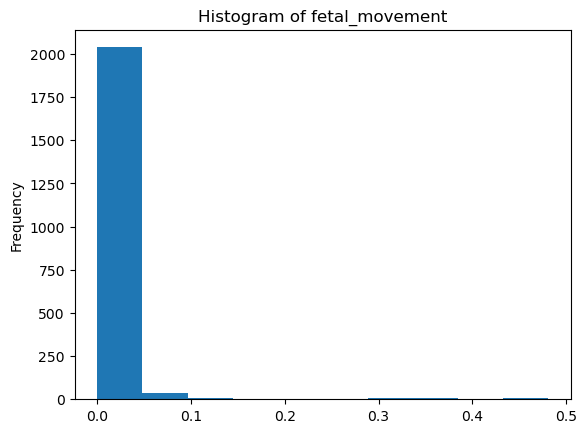

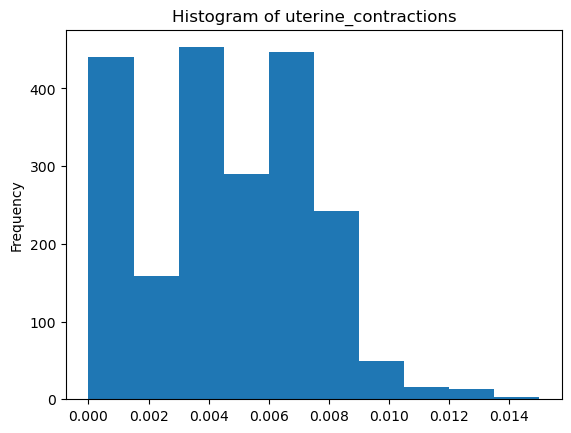

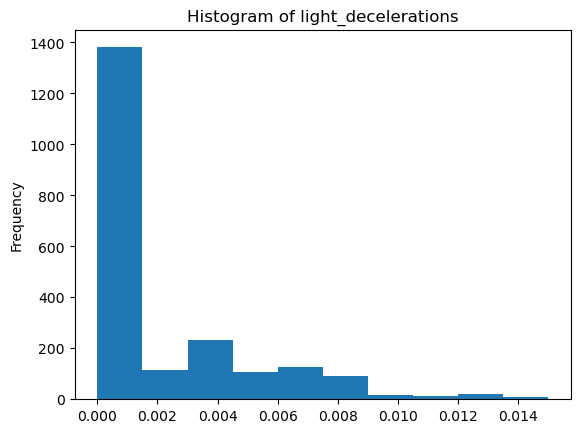

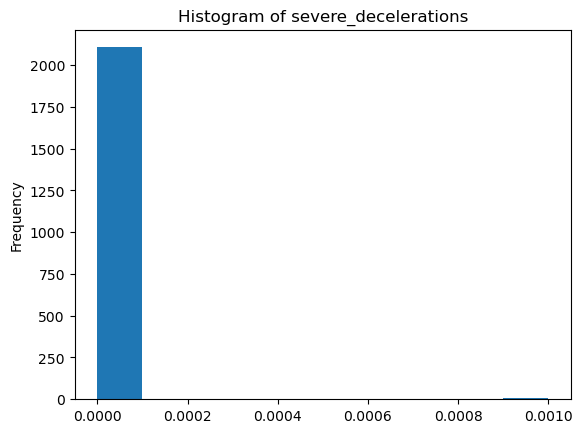

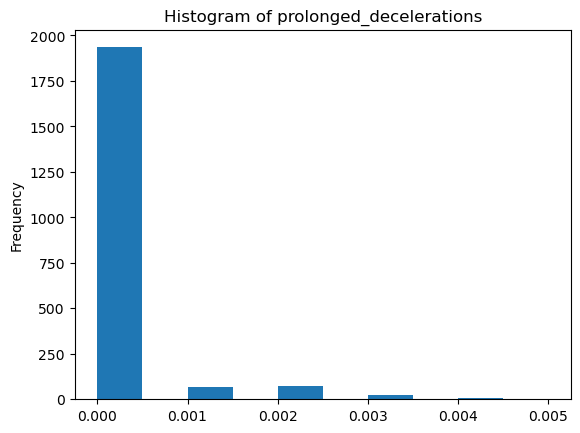

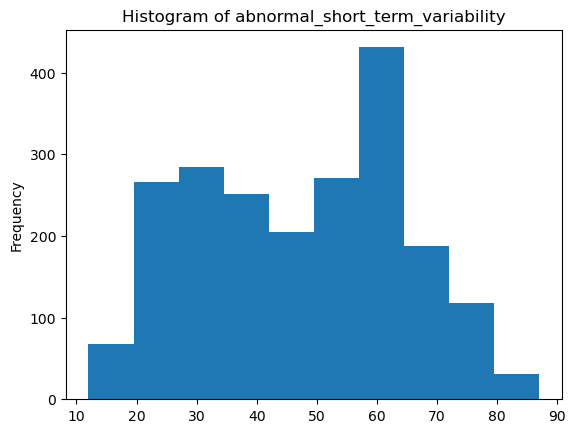

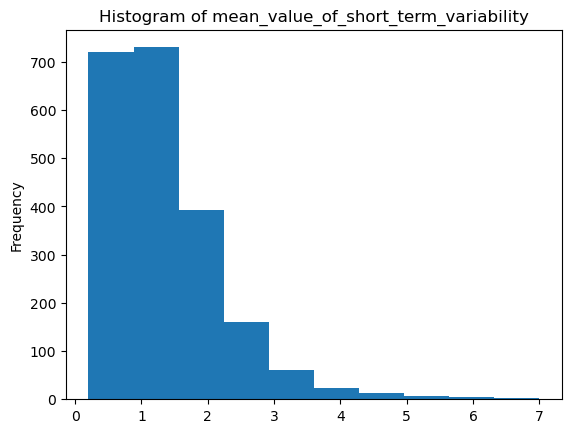

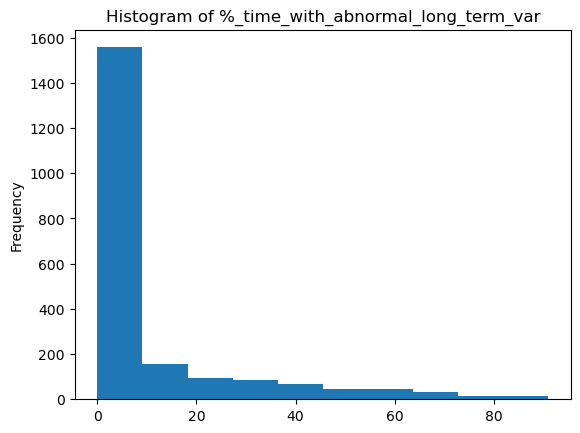

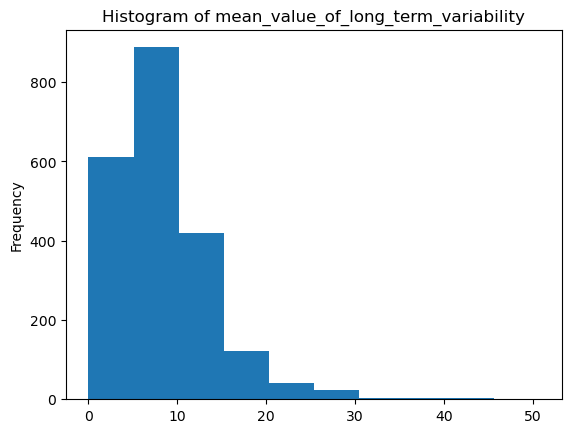

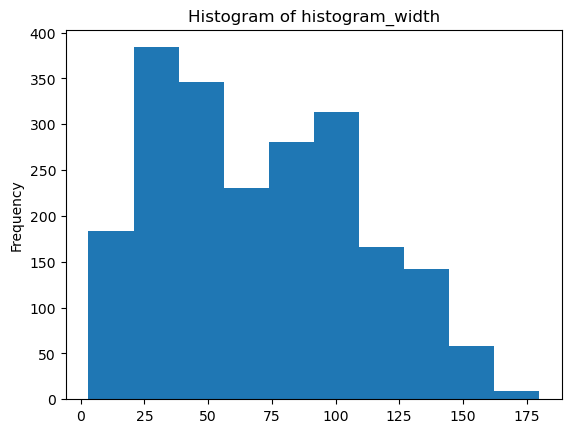

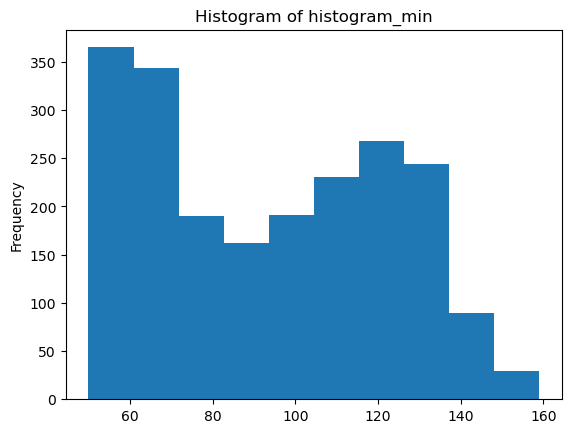

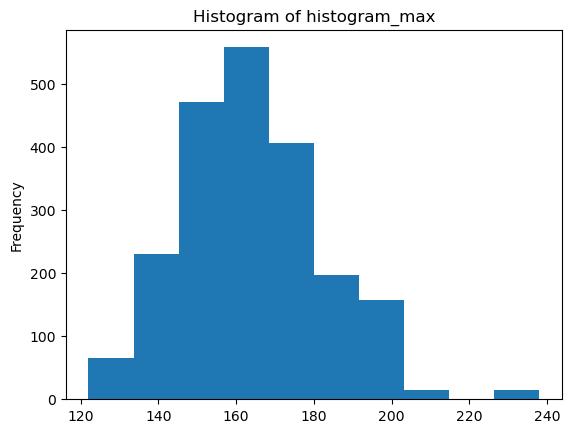

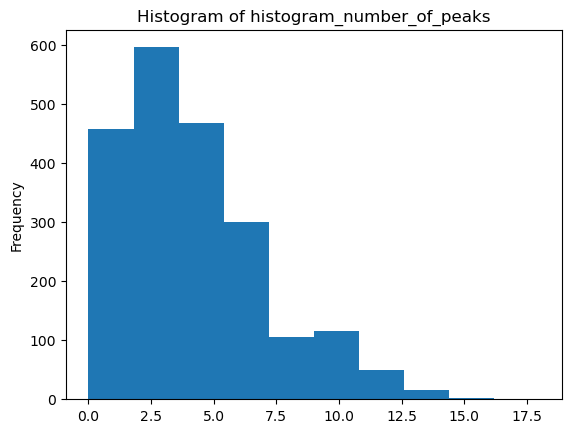

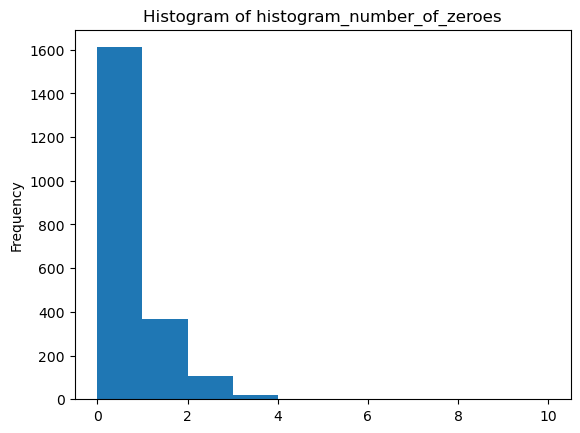

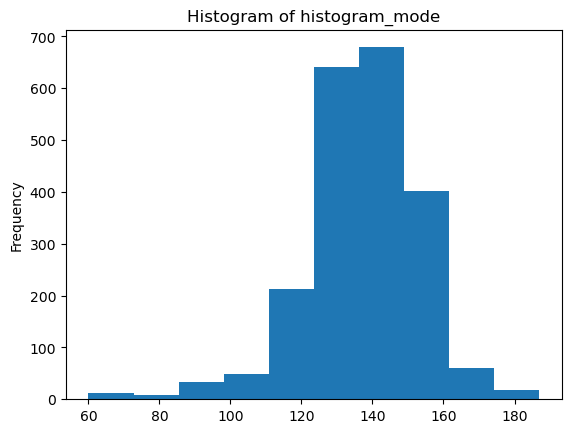

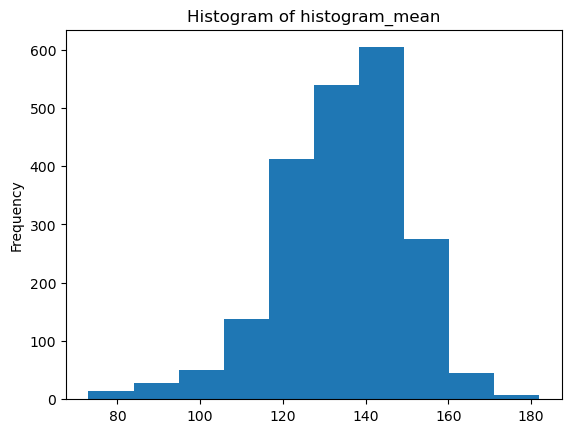

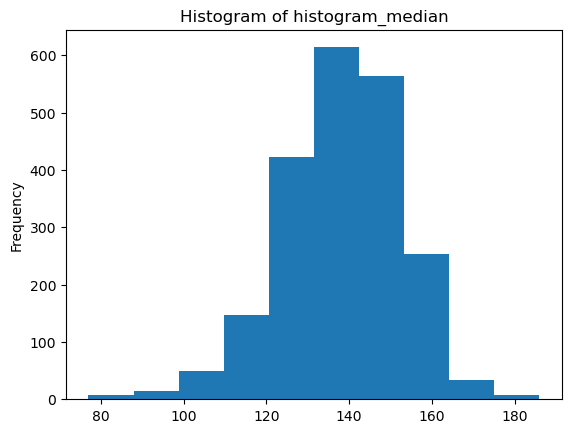

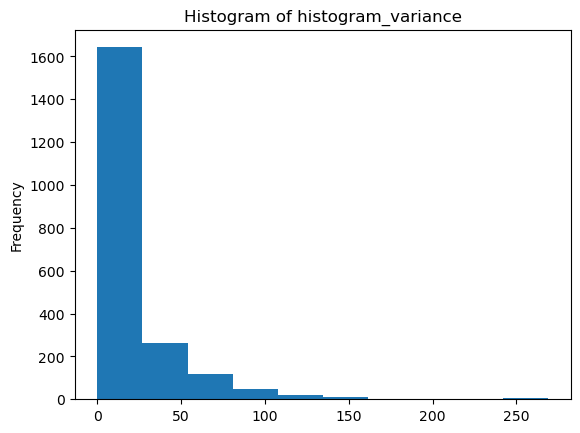

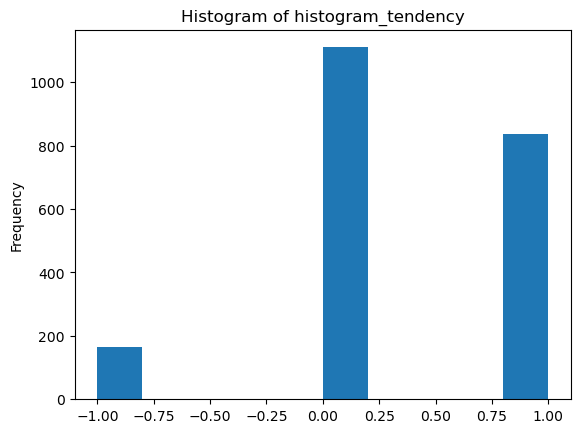

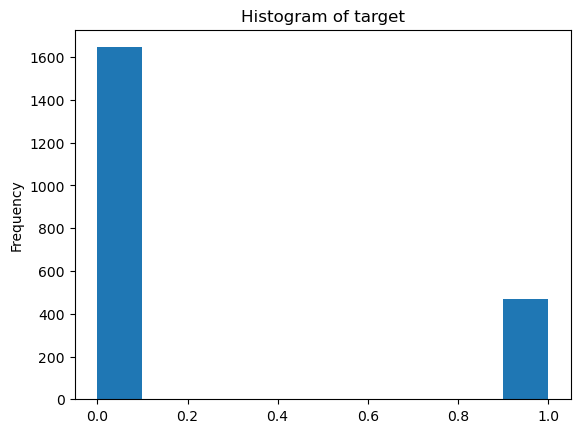

In [35]:
# Plotting the histogram for each feature

for col in df_fetal.columns:
    # Create a histogram for the column
    df_fetal[col].plot.hist()

    # Set the title of the plot
    plt.title(f"Histogram of {col}")

    # Show the plot
    plt.show()

### Distribution Plot


 1. Column name : baseline_value


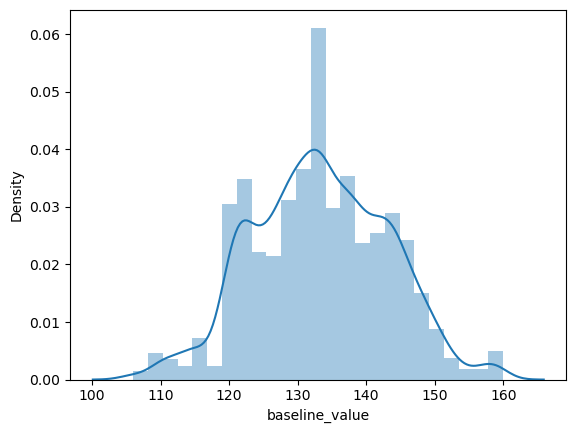


 2. Column name : accelerations


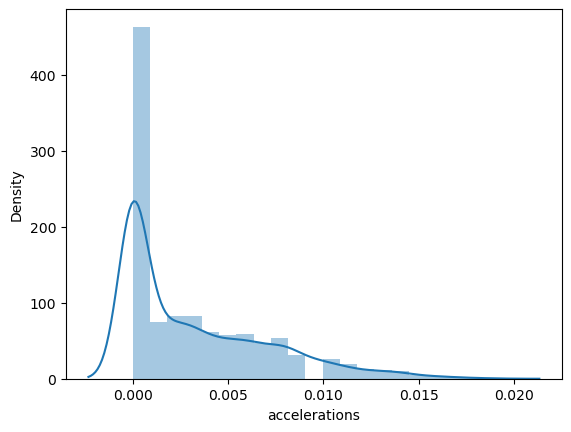


 3. Column name : fetal_movement


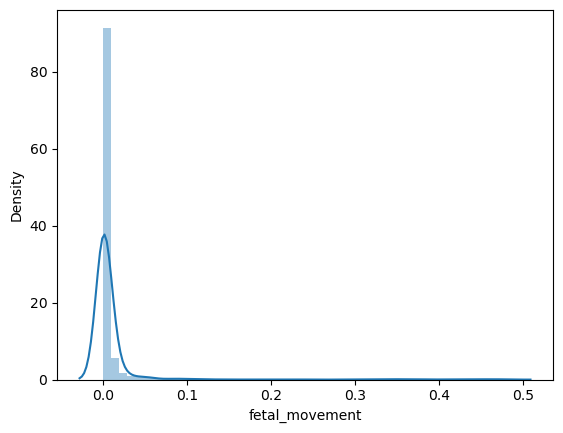


 4. Column name : uterine_contractions


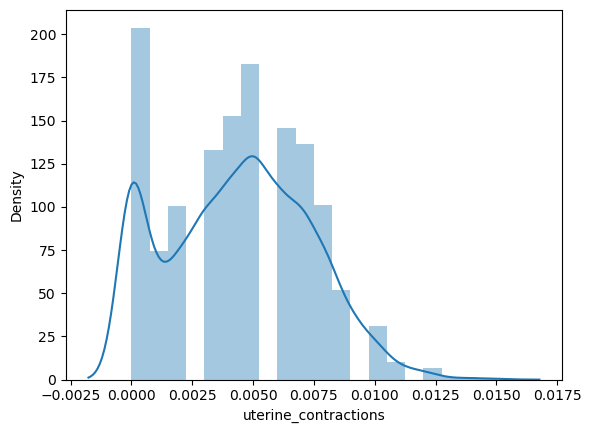


 5. Column name : light_decelerations


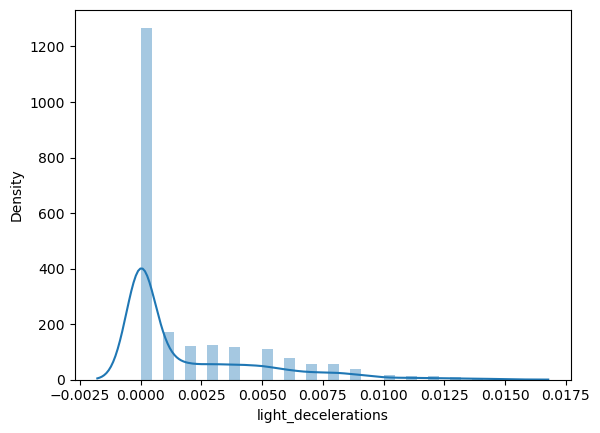


 6. Column name : severe_decelerations


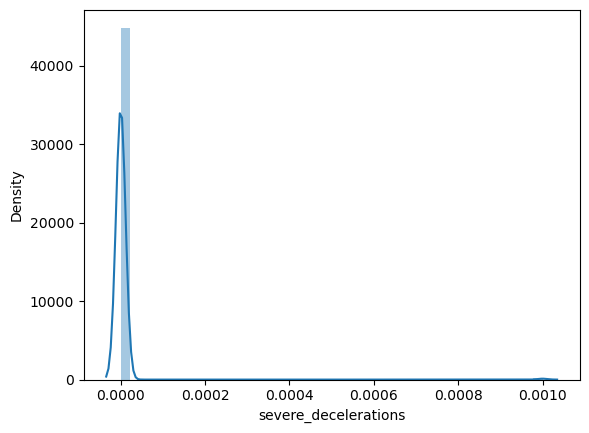


 7. Column name : prolonged_decelerations


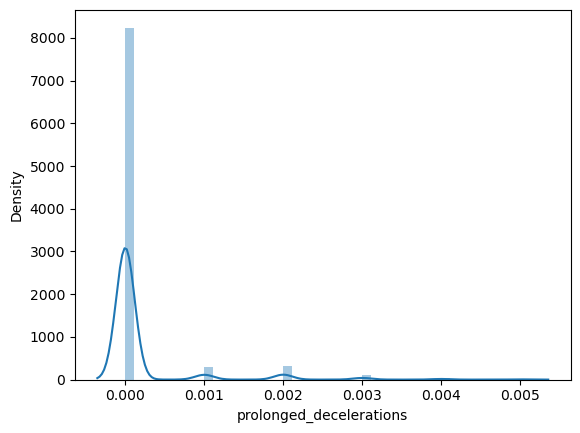


 8. Column name : abnormal_short_term_variability


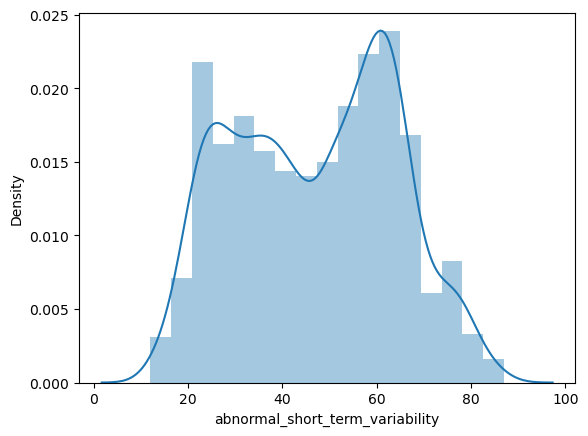


 9. Column name : mean_value_of_short_term_variability


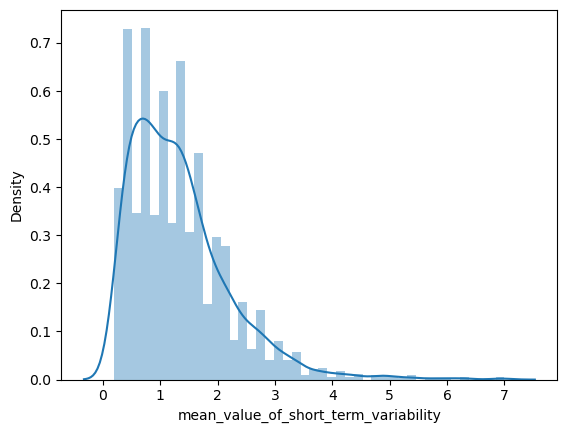


 10. Column name : %_time_with_abnormal_long_term_var


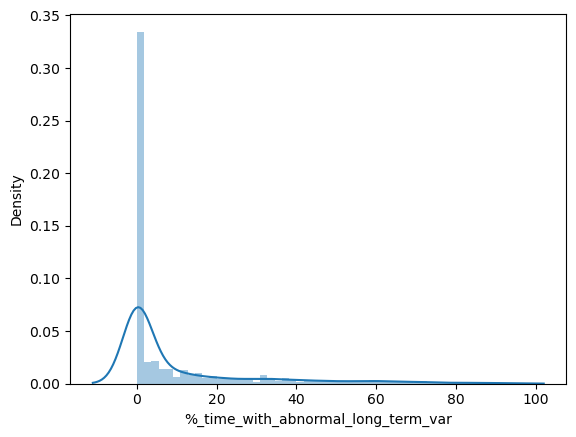


 11. Column name : mean_value_of_long_term_variability


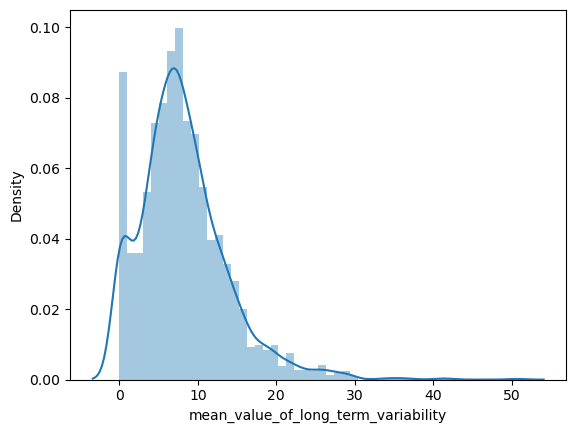


 12. Column name : histogram_width


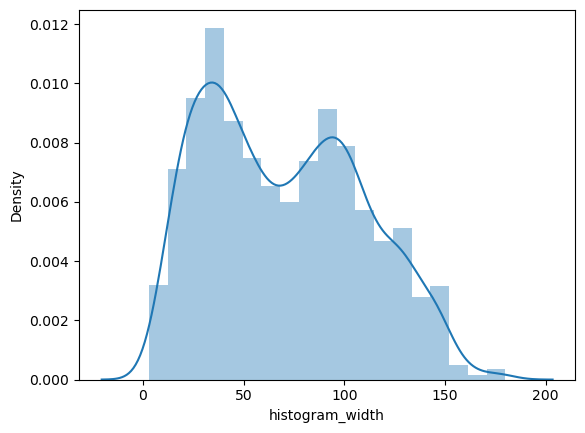


 13. Column name : histogram_min


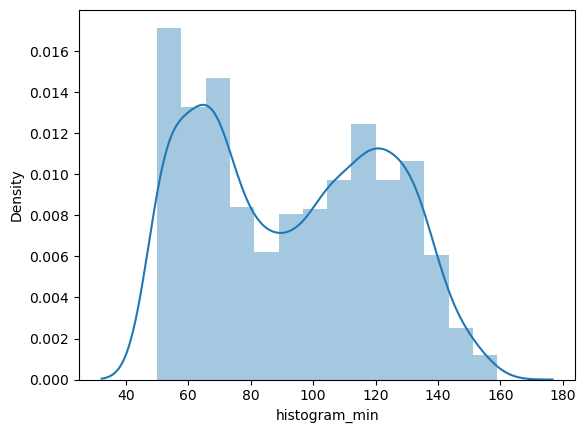


 14. Column name : histogram_max


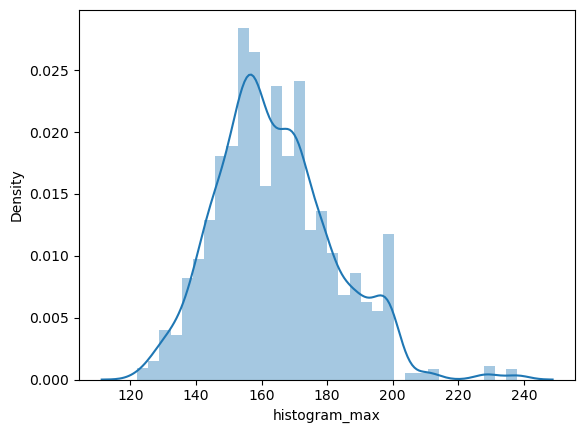


 15. Column name : histogram_number_of_peaks


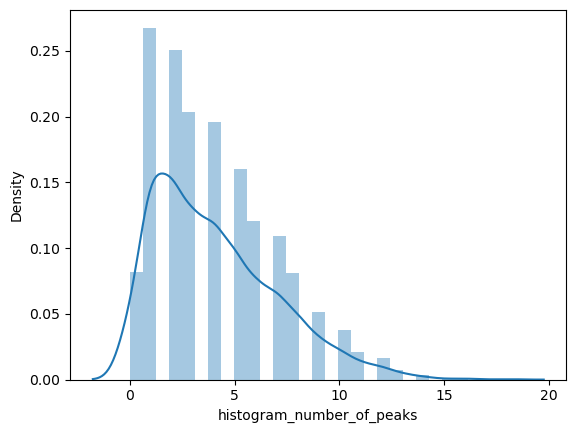


 16. Column name : histogram_number_of_zeroes


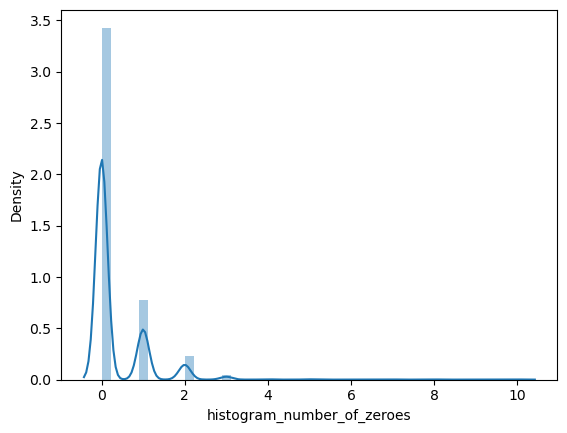


 17. Column name : histogram_mode


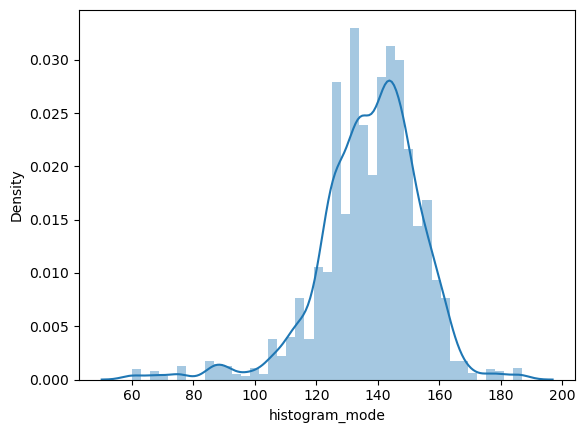


 18. Column name : histogram_mean


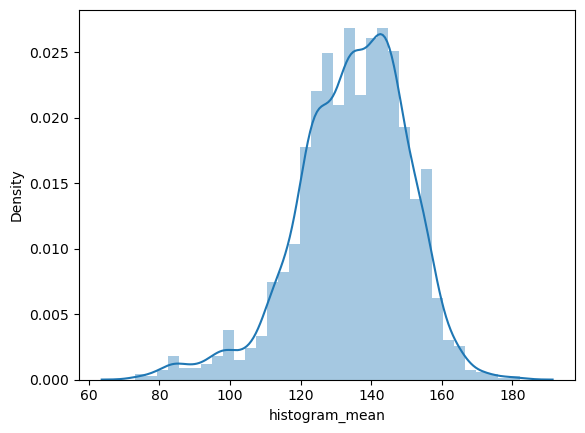


 19. Column name : histogram_median


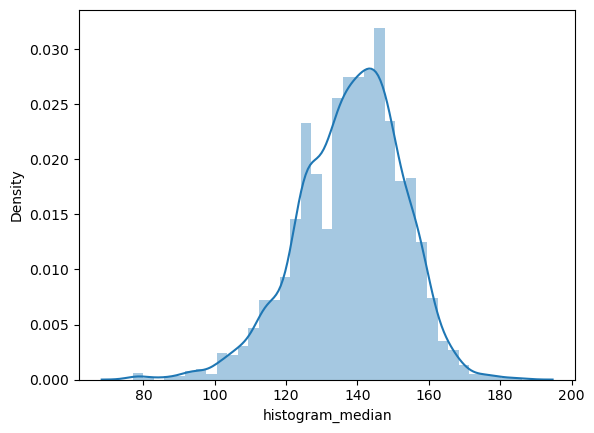


 20. Column name : histogram_variance


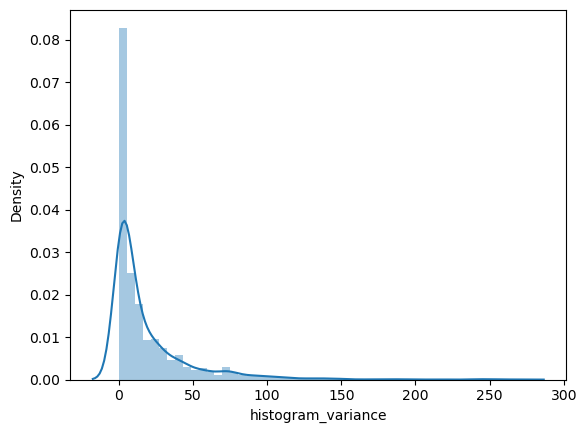


 21. Column name : histogram_tendency


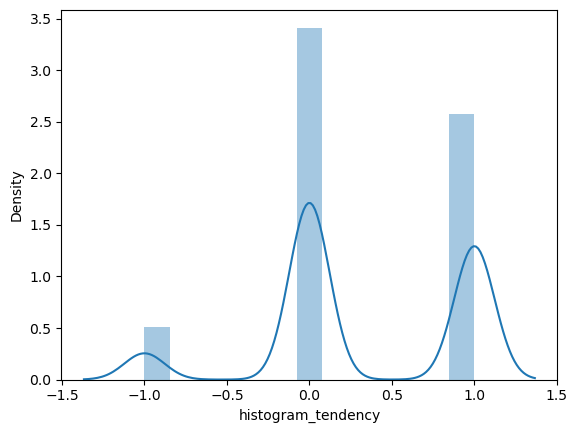

In [36]:
# Plotting the Distribution for each feature

count2 = 1
for i in list(df_fetal.describe(include='int64' and 'float64').columns):
    print('\n {}. Column name : {}'.format(count2,i))
    sns.distplot(df_fetal[i], kde_kws={'bw': 0.2})
    plt.show()
    count2 += 1

### Correlation Heatmap

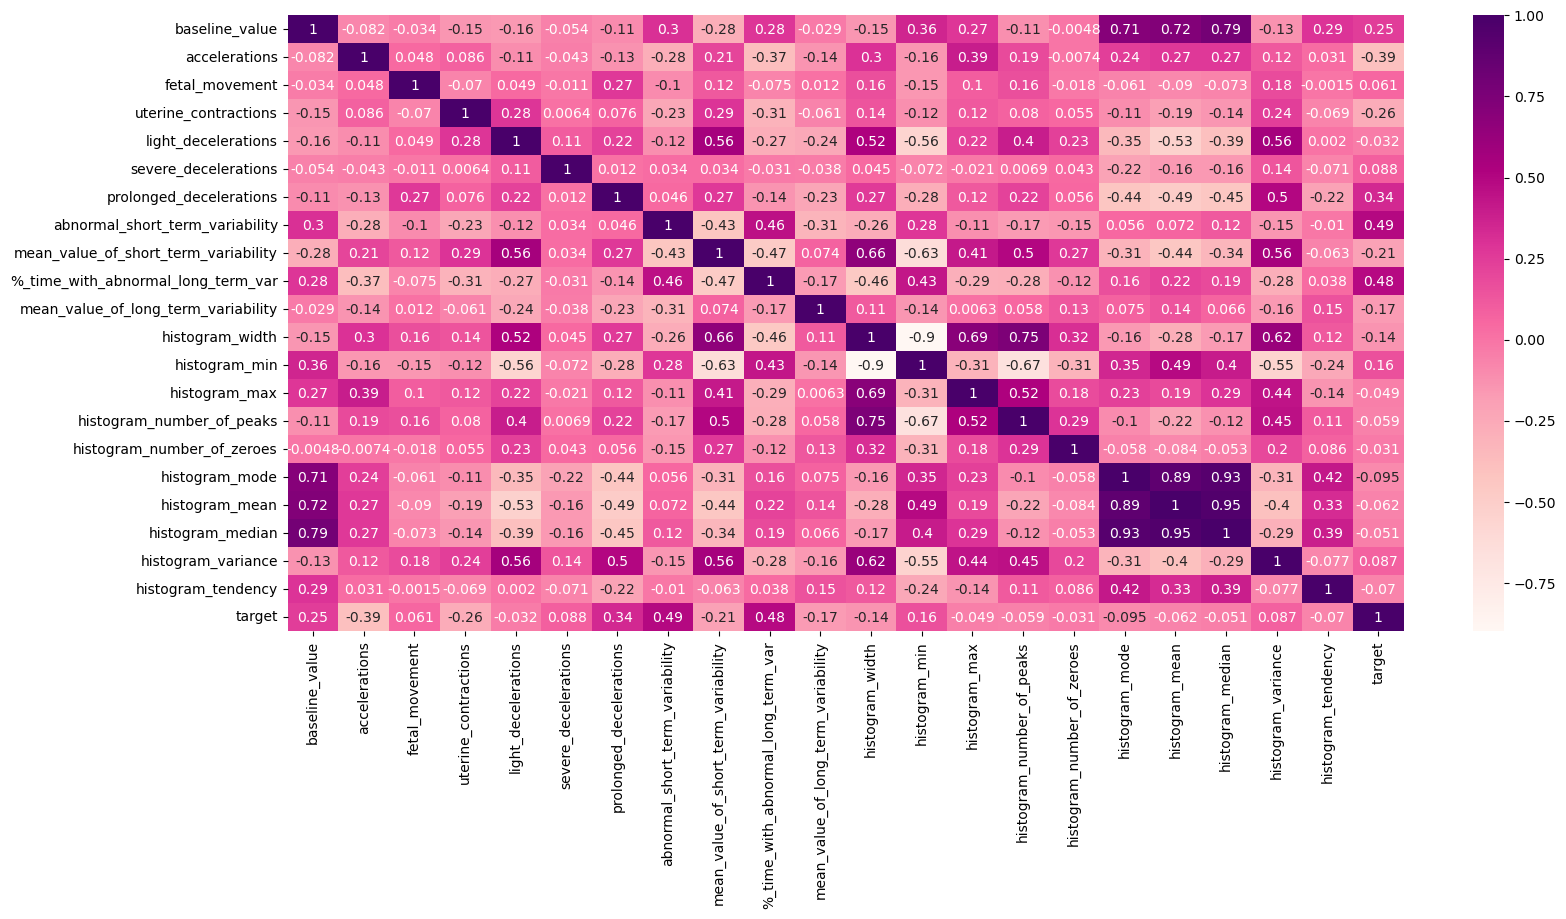

In [37]:
# Correlation Heatmap

corr = df_fetal.corr()
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

### Boxplots of Cardiotocograms (CTG) Histograms

In [38]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

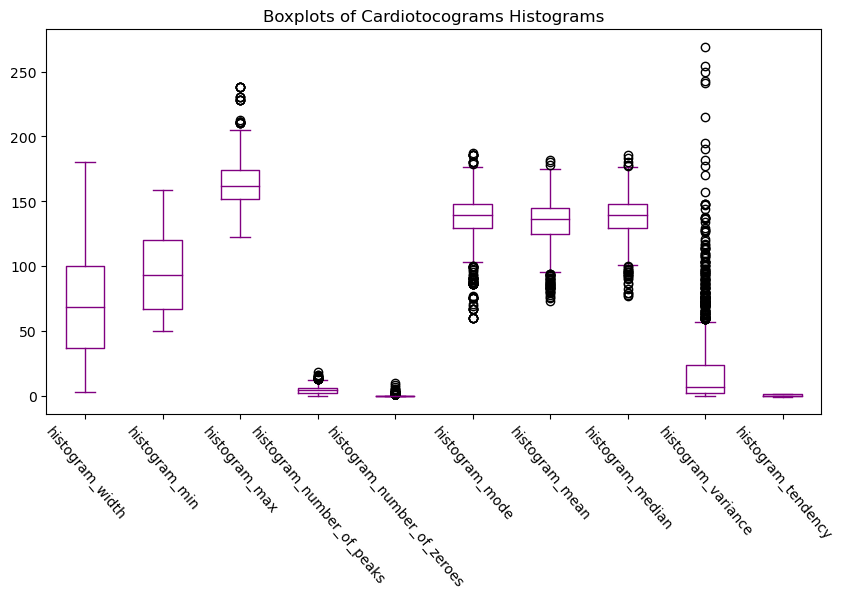

In [39]:
df_fetal[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of Cardiotocograms Histograms');

### Regression Plot


 22. Column name : baseline_value


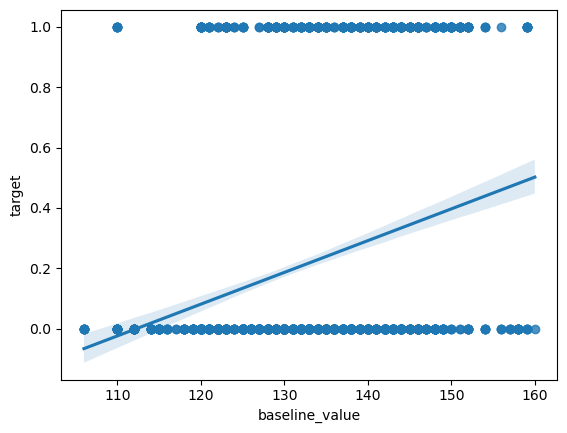


 23. Column name : accelerations


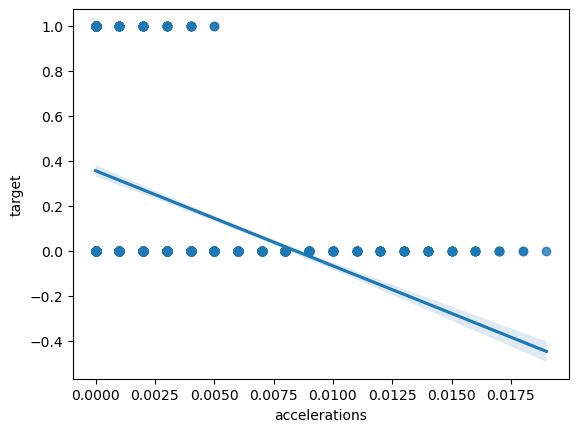


 24. Column name : fetal_movement


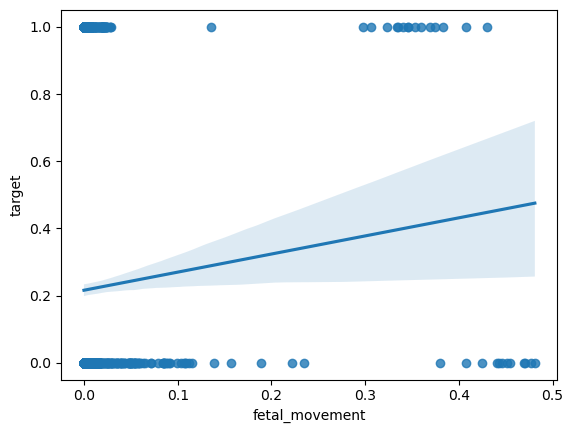


 25. Column name : uterine_contractions


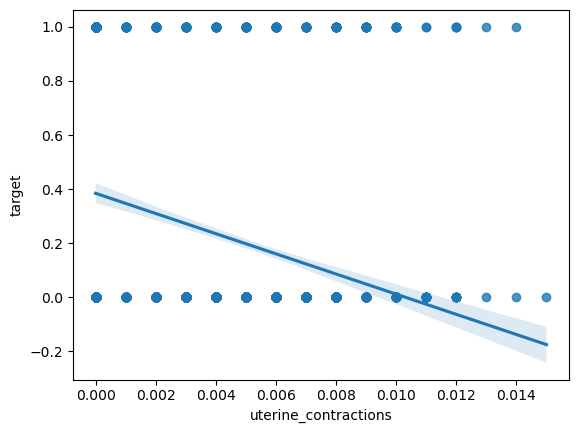


 26. Column name : light_decelerations


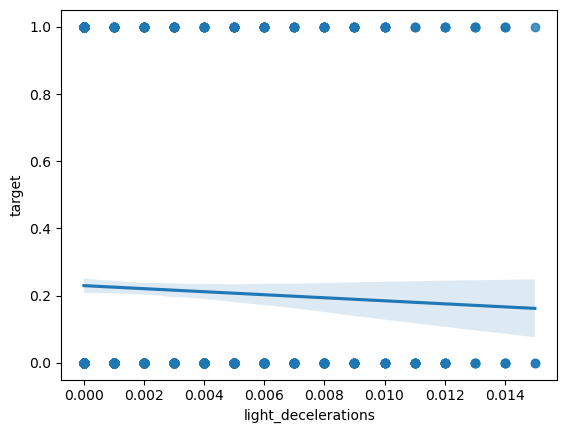


 27. Column name : severe_decelerations


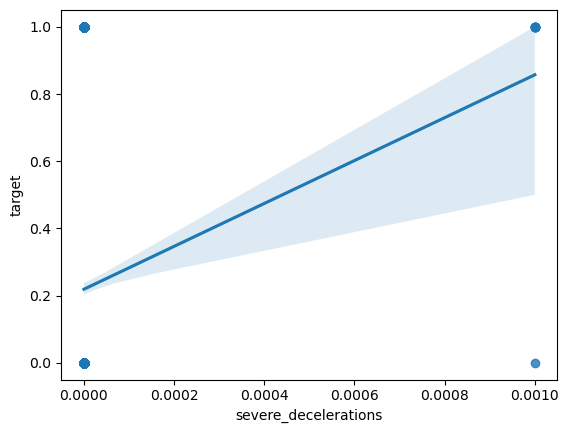


 28. Column name : prolonged_decelerations


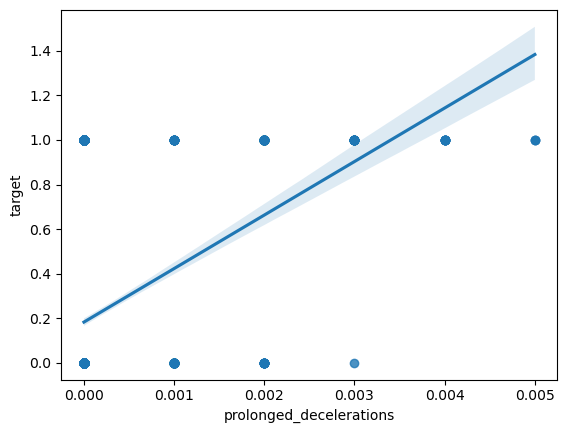


 29. Column name : abnormal_short_term_variability


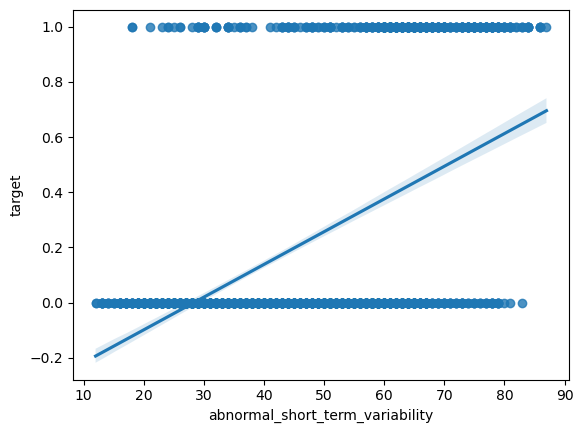


 30. Column name : mean_value_of_short_term_variability


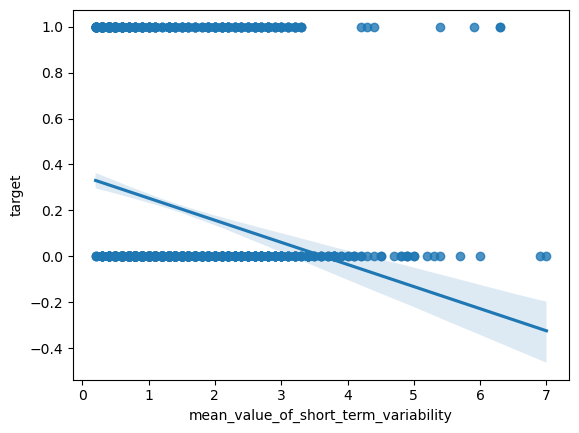


 31. Column name : %_time_with_abnormal_long_term_var


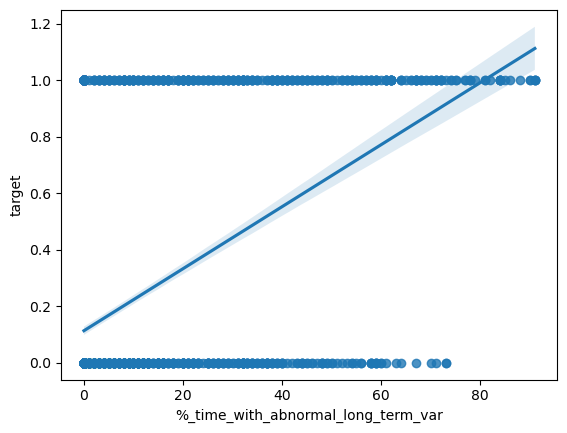


 32. Column name : mean_value_of_long_term_variability


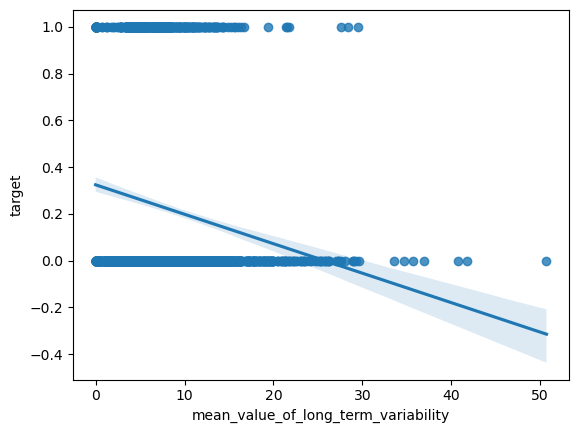


 33. Column name : histogram_width


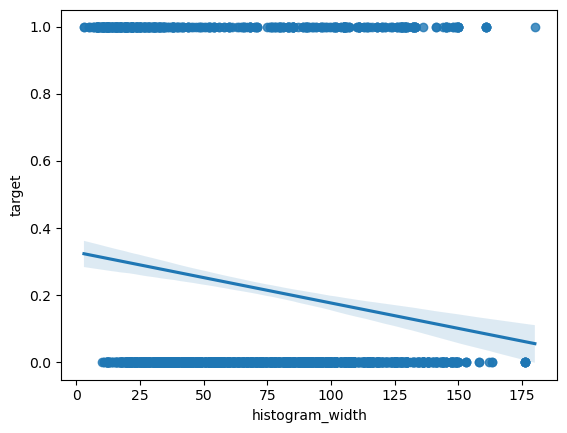


 34. Column name : histogram_min


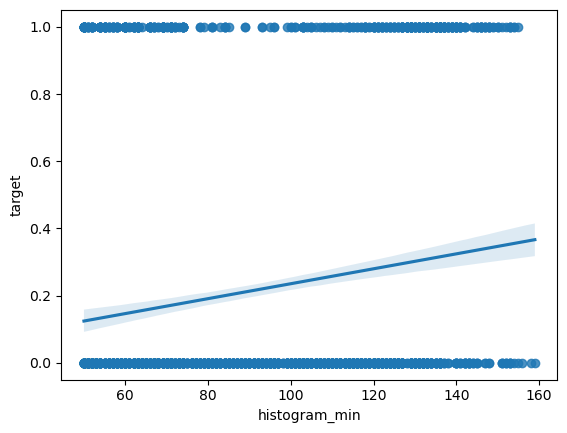


 35. Column name : histogram_max


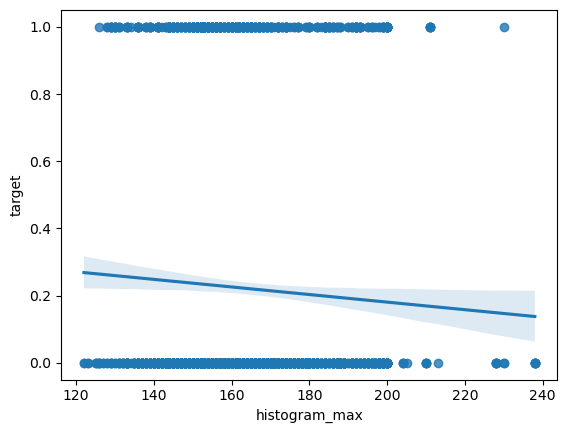


 36. Column name : histogram_number_of_peaks


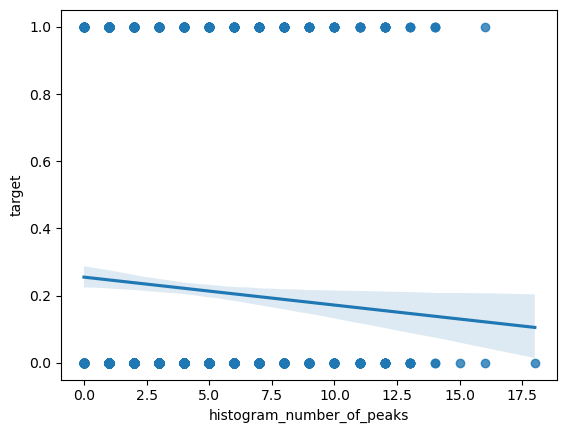


 37. Column name : histogram_number_of_zeroes


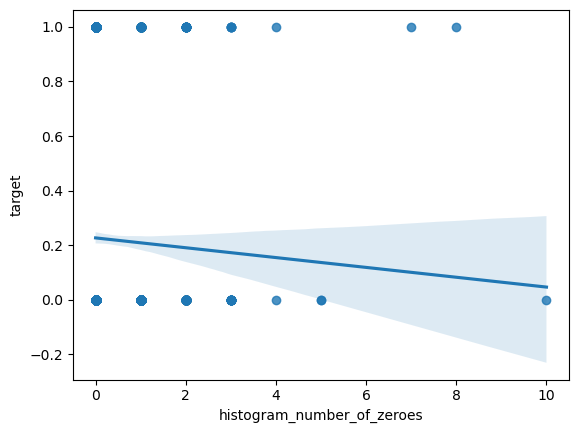


 38. Column name : histogram_mode


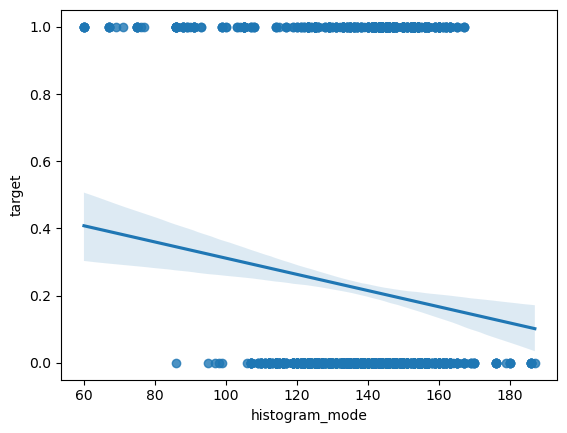


 39. Column name : histogram_mean


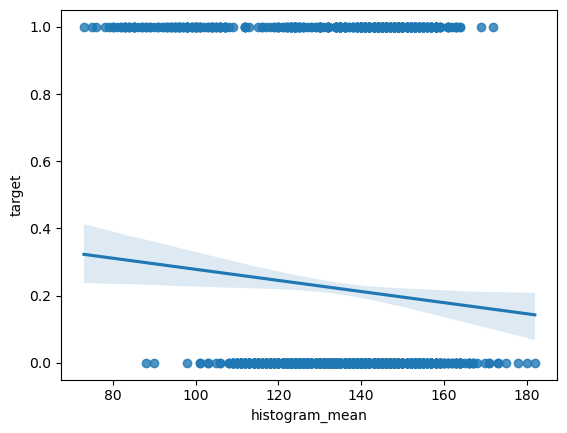


 40. Column name : histogram_median


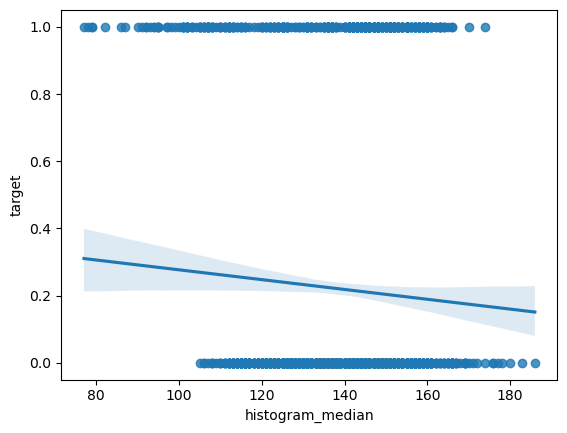


 41. Column name : histogram_variance


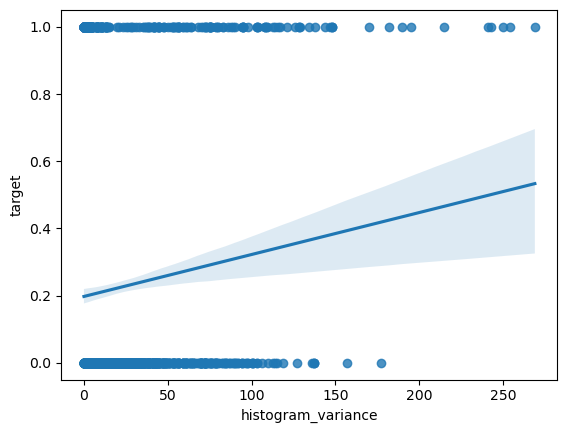


 42. Column name : histogram_tendency


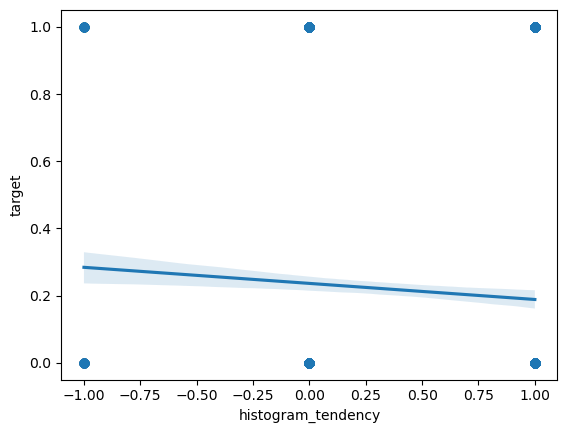

In [40]:
# Regression Plot for each feature

count0 = 1
for i in list(df_fetal.describe(include='int64' and 'float64').columns):
    print('\n {}. Column name : {}'.format(count2,i))
    #sns.distplot(df_fetal[i], kde_kws={'bw': 0.2})
    
    sns.regplot(x=df_fetal[i], y=df_fetal['target'], data=df_fetal);
    
    plt.show()
    count2 += 1

#### Observations - 
1. The dataset contains 21 features and 1 target variable (3 different classes).
2. Baseline Value : From Distribution plot it is seen the vast majority of the baseline values for fetal heart rate were 0.06.
3. Accelerations : From Histogram plot it is seen the majority of observed fetal heart rate accelerations were 0.00.
4. Fetal Movement : From Histogram plot it is seen the fetal movement value with the highest frequency is once again 0.00.
5. Severe Decelerations : From value count it is seen there were only 7 observed severe decelerations in the dataset.
6. Abnormal Short-Term Variability : This is a measure of the percentage of time with abnormal short-term variability. According to the American Academy of Family Physicians (AAFP.org), short-term variability of the fetal heart rate is defined as "the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm." In other words, it is normal and expected to have some variability of the fetal heart rate around the baseline. However, this column is a measure of the percentage of time that an abnormal variability was observed. Considering that most of the fetal health outcomes were normal, it is surprising that there were quite a few records with high abnormal percentages of short-term variability.
7. Correlation Heatmap : The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.
8. Histogram Columns : A lot of the features in this dataset pertained to the actual histogram that is printed out during the duration of the Cardiotocograms (CTG). They aren't particularly intuitive, and it seems that the significance of the Cardiotocograms (CTG) histogram measurements was somewhat ambiguous. But before I got rid of these columns, I was curious how these measurements would impact the prediction of fetal health outcomes.
9. There are some features that are normally distributed - baseline_value, abnormal_short_term_variability, histogram_max, histogram_mode, histogram_mean, histogram_median. But there are other features that are skewed and might need adjustment if used in ML models.


# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

### Feature Extraction

In [41]:
# Feature extraction

y_feat = df_fetal['target']
X_feat = df_fetal.drop(columns=['target', 'histogram_tendency'])

In [42]:
X_feat

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,%_time_with_abnormal_long_term_var,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0


### 1. Information Gain

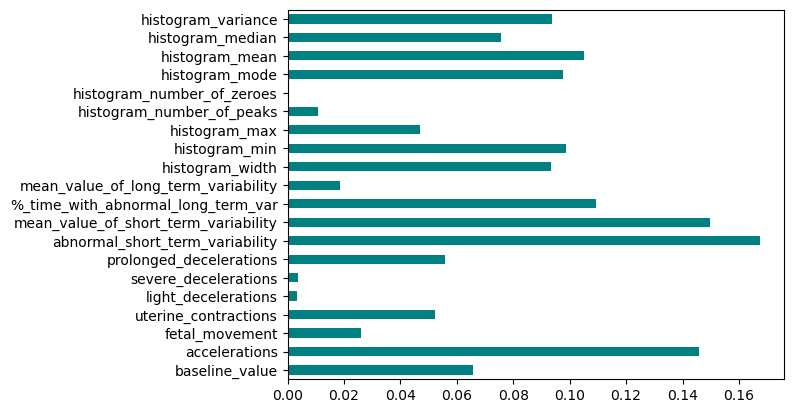

In [43]:
# Information Gain

importances = mutual_info_classif(X_feat, y_feat)
feat_importances = pd.Series(importances, X_feat.columns[0:len(df_fetal.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

From the above Plot, top 5 features selected based on Information Gain are : 
1. abnormal_short_term_variability 
2. mean_value_of_short_term_variability
3. accelerations
4. histogram_min
5. %_time_with_abnormal_long_term_var

### 2. Chi-square Test

In [44]:
# Chi-square Test

k_best = SelectKBest(score_func=chi2, k=6)
fit = k_best.fit(X_feat, y_feat)

# Summarize scores
np.set_printoptions(precision=2)
#print(fit.scores_)
features = fit.transform(X_feat)

feature_names =  ['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       '%_time_with_abnormal_long_term_var',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']

mask = k_best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
print("Top 5 features selected based on Chi2 score are : " + str(new_features))

Top 5 features selected based on Chi2 score are : ['abnormal_short_term_variability', '%_time_with_abnormal_long_term_var', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_variance']


Top 5 features selected based on Chi2 Test are : 
1. abnormal_short_term_variability 
2. %_time_with_abnormal_long_term_var
3. histogram_width
4. histogram_min
5. histogram_variance

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

#### Observations :

From the provided list of Feature Selection Techniques, used Information Gain and Chi2 Test.

##### From the Plot, top 5 features selected based on Information Gain are : 
1. abnormal_short_term_variability 
2. mean_value_of_short_term_variability
3. accelerations
4. histogram_min
5. %_time_with_abnormal_long_term_var

###### Top 5 features selected based on Chi2 Test are : 
1. abnormal_short_term_variability 
2. %_time_with_abnormal_long_term_var
3. histogram_width
4. histogram_min
5. histogram_variance

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

### Dividing dataset into train and test datasets. 

In [45]:
# The dataset is divided into train and test datasets. 
# Using stratify parameter to make sure class ratios are distributed evenly across train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## 6.1 ML technique 1 + Justification

### Model #1: DecisionTree Classifier

### Justification: I used a Decision Tree since they are known to work well with imbalanced data, such as my target fetal health variable.

In [46]:
# Instantiating and fitting decision tree model

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
# Confusion matrix and classification report

y_pred = tree_clf.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Recall score: ',recall_score(y_test, y_pred))

Confusion Matrix:
[[487   7]
 [ 40 100]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       494
           1       0.93      0.71      0.81       140

    accuracy                           0.93       634
   macro avg       0.93      0.85      0.88       634
weighted avg       0.93      0.93      0.92       634



Recall score:  0.7142857142857143


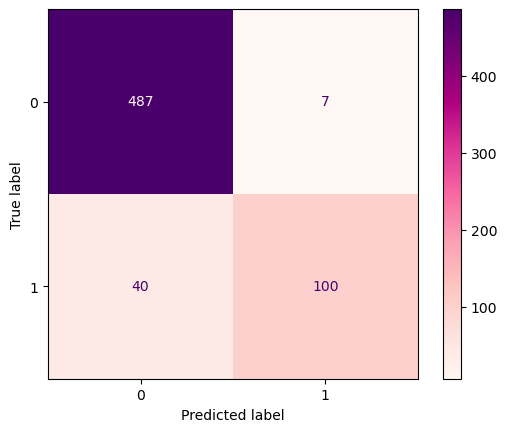

In [48]:
# Plotting confusion matrix

plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

While an accuracy of 93% sounds like a good metric, it is important to note that this model missed 40 members of the at-risk fetal health class. Since we are dealing with the health outcomes and lives of babies, this is simply not acceptable. We will be evaluating the models with a focus on recall/sensitivity in order to minimize false negatives or Type II errors. In this case, the baseline recall value is 71%.

### Feature Importances

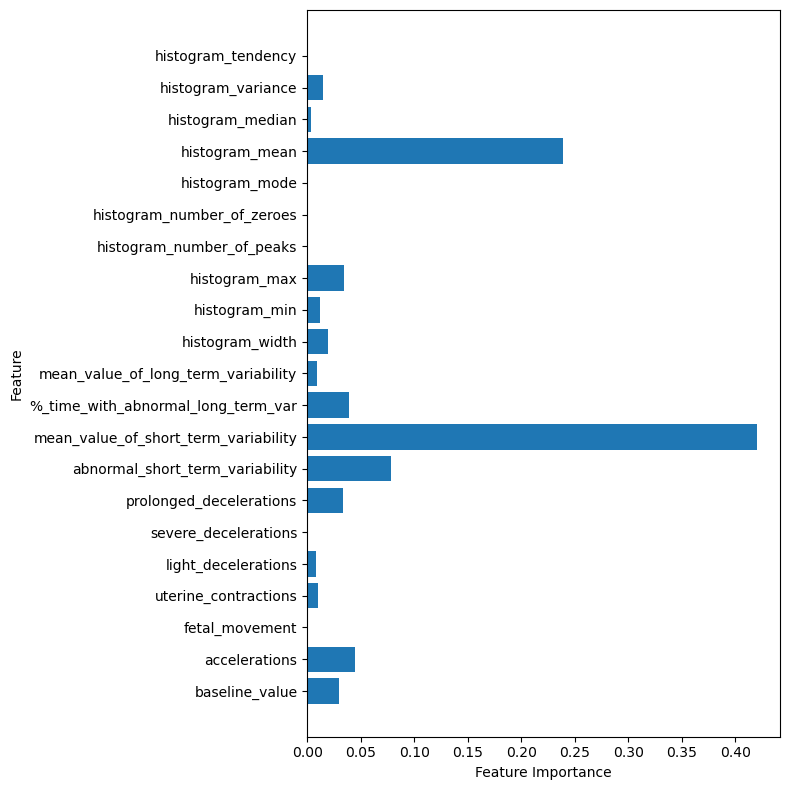

In [49]:
# Plotting feature importances

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.tight_layout()


The baseline decision tree model has allotted the most importance to mean_value_of_short_term_variability, abnormal_short_term_variability and CTG histogram mean. Given the strong correlations noted earlier, it is evident that the classifier prioritized these particular features.

### Solving Imbalanced Classes Problem

As observed previously, the fetal health outcome classes are quite imbalanced, with the majority being the negative (normal health) class. To address this, let's run the baseline decision tree model once again, but with the class_weight parameter set to "balanced". This adjusts so total weights are equal accross classes; in other words, members of the negative (normal health) class will be given less weight than members of the positive (at-risk) class. Opted to address this imbalance in this way so as not to sacrifice any data (as occurs in undersampling) or overfit to any duplicates from oversampling.

### Decision Tree with Balanced Class Weight

In [50]:
# Instantiating and fitting decision tree model

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [51]:
# Confusion matrix and classification report

y_pred = tree_clf.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Recall score: ',recall_score(y_test, y_pred))

Confusion Matrix:
[[461  33]
 [ 23 117]]


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       494
           1       0.78      0.84      0.81       140

    accuracy                           0.91       634
   macro avg       0.87      0.88      0.87       634
weighted avg       0.91      0.91      0.91       634



Recall score:  0.8357142857142857


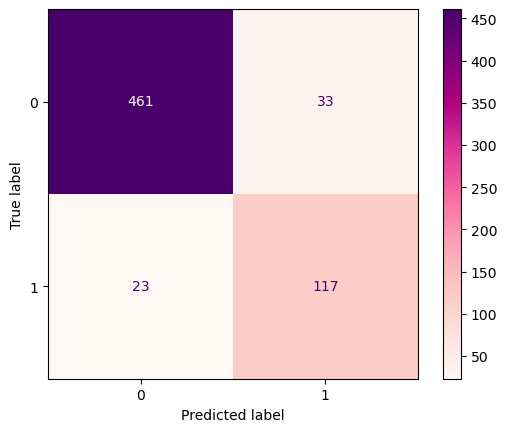

In [52]:
# Plotting confusion matrix

plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

#### Observation:
After balancing the class weights, the model has been improved to a recall value of 84%. But it still missed 23 of the at-risk class, so it requires further improvement.

## 6.2 ML technique 2 + Justification

### Model #2: Random Forest Classifier

### Justification: After using Decision Tree, let's now explore Random Forest Classifier which is classification algorithm consisting of many decision trees combined and get a more accurate result as compared to a single tree.

In [53]:
# Instantiating and fitting Random Forest model

random_forest = RandomForestClassifier(n_estimators=100, criterion ='gini', max_depth = 15, min_samples_leaf = 1, min_samples_split = 2)

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [54]:
# Confusion matrix and classification report

y_pred = random_forest.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Recall score: ',recall_score(y_test, y_pred))

Confusion Matrix:
[[485   9]
 [ 20 120]]


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.93      0.86      0.89       140

    accuracy                           0.95       634
   macro avg       0.95      0.92      0.93       634
weighted avg       0.95      0.95      0.95       634



Recall score:  0.8571428571428571


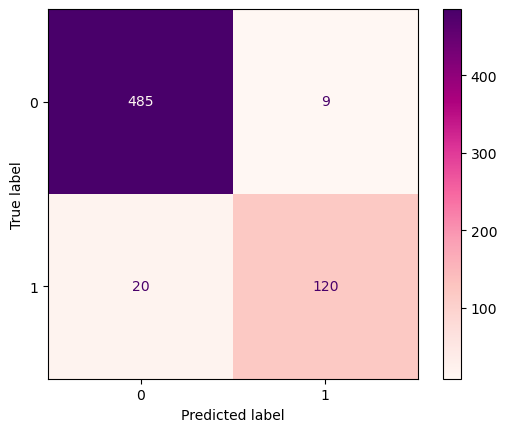

In [55]:
# Plotting confusion matrix

plot_confusion_matrix(random_forest, X_test, y_test,cmap="RdPu")
plt.show()

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

F1=0.892, AUC=0.967


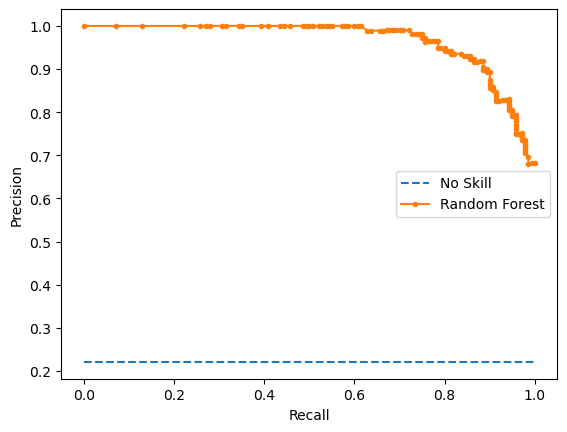

In [56]:
# Plotting precision-recall curve

random_forest.fit(X_train, y_train)

# Predicting probabilities
probs = random_forest.predict_proba(X_test)

# Keeping probabilities for the positive outcome only
probs = probs[:, 1]

# Predicting class values
y_pred = random_forest.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)

# Summarizing scores
print('F1=%.3f, AUC=%.3f' % (f1, auc))

# Plotting the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')

# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Showing the legend
plt.legend()

# Showing the plot
plt.show()

The best model was the one using the Random Forest Classifier. 

This model achieved a recall score of 86%, meaning that 86% of the at-risk class was captured by the model. 
It has an accuracy score of 95%, meaning that 95% of the total predictions made by the model were correct. 

The precision-recall curve above shows that while recall was prioritized, the model still did pretty well with precision too. This is also demonstrated by the model's F1 score of 89.2%. The AUC or Area Under the Curve of 96.7% also confirms that this model is working well. 


In [57]:
features = ['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       '%_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

### Feature importances and Model Explainability for the Random Forest model.

In [58]:
eli5.explain_weights(random_forest, 
                     top=50, feature_names=features)

Weight,Feature
0.1570 ± 0.2639,mean_value_of_short_term_variability
0.1176 ± 0.2100,abnormal_short_term_variability
0.0876 ± 0.1631,%_time_with_abnormal_long_term_variability
0.0826 ± 0.1328,histogram_mean
0.0667 ± 0.1388,accelerations
0.0614 ± 0.1225,prolonged_decelerations
0.0539 ± 0.1007,histogram_mode
0.0482 ± 0.0734,histogram_min
0.0477 ± 0.0763,uterine_contractions
0.0427 ± 0.0710,histogram_median


According to the above breakdown, the most impactful features were mean_value_of_short_term_variability, abnormal_short_term_variability, %_time_with_abnormal_long_term_variability, histogram_mean, accelerations

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

The positive class for fetal health is 'At Risk' and the negative class is 'Normal'. The objective is to minimize false negatives and error on the side of caution. Being overly cautious is the ethical course of action when dealing with maternal-fetal health. Misclassifying a member of the 'Normal' class as 'At Risk' is a minor inconvenience (and likely a scare for the mother), but misclassifying a member of the 'At Risk' class as 'Normal' has far more serious consequences. Objective here is to make sure that we catch every single baby that is in distress so that decisions can be made accordingly. Therefore, Recall/Sensitivity is prioritized as the metric by which to evaluate the models. This will ensure that all instances of the positive class are captured, which makes this the most important metric for the problem at hand. By doing this, we avoid false negatives or Type II errors.



The best model was the one using the Random Forest Classifier. This model achieved a recall score of 86%, meaning that 86% of the at-risk class was captured by the model. It has an accuracy score of 95%, meaning that 95% of the total predictions made by the model were correct. 

It is important to note that while there is a trade-off between recall and precision, which affects accuracy, you simply cannot put a price on a human life. So recall is chosen as priority at the expense of other metrics for this particular problem.

We learned about various Data analytics techniques and Data Visualizations techniques. Also, learned about Exploratory Data Analysis and Feature Selection techniques. We also learned about various Classification Models and it's evaluation metrics.
We learned had challenges in solving the class imbalance issue but ultimately we could solve the issue as well.

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!